In [15]:
# imports
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import ogcore.output_plots as op
import ogcore.output_tables as ot
from ogcore.utils import safe_read_pickle

# set plot style
plt.style.use("ogcore.OGcorePlots")
# set current directory
CUR_DIR = os.getcwd()

In [16]:
# Set path for simulation to use
sim_path = os.path.join(CUR_DIR, "OG-PHL-Education")

In [17]:
# read in output from health ins simulation
base_params = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_BASELINE", "model_params.pkl"
        )
    )
base_tpi = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_BASELINE", "TPI", "TPI_vars.pkl"
        )
    )
reform_params = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_EDUC", "model_params.pkl"
        )
    )
reform_tpi = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_EDUC", "TPI", "TPI_vars.pkl"
        )
    )



/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_31764/2151773341.py:12: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


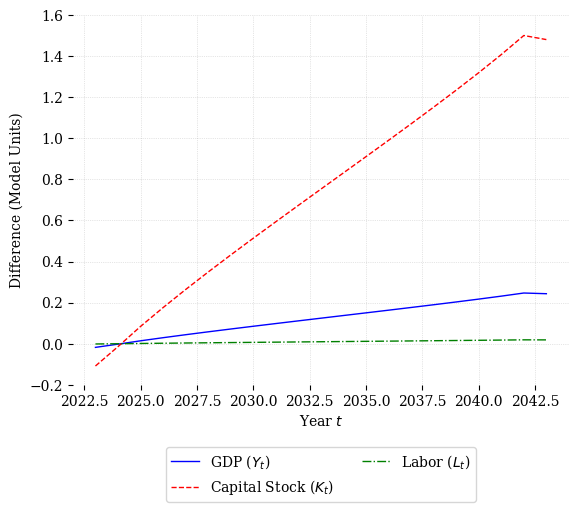

In [19]:
# use a op function to plot pct diff in GDP, K, L
fig = op.plot_aggregates(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["Y", "K", "L"],
    plot_type="diff",
    num_years_to_plot=21,
    start_year=base_params.start_year
    )
fig.show()


In [ ]:
fig = op.plot_gdp_ratio(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["D"],
    plot_type="levels",
    num_years_to_plot=50,
    start_year=base_params.start_year,
)
fig.show()

In [20]:
# use an ot function to table
ot.macro_table(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["Y", "K", "L"],
    output_type="pct_diff",
    num_years=10,
    include_SS=True,
    start_year=base_params.start_year,
    table_format="Excel",
)

Year,Variable,2023,2024,2025,2026,2027,2028,2029,2030,2031,2032,2023-2032,SS
0,GDP ($Y_t$),-0.47,-0.06,0.36,0.74,1.09,1.43,1.76,2.08,2.39,2.70,1.23,5.30
1,Capital Stock ($K_t$),-0.47,-0.06,0.35,0.72,1.08,1.42,1.74,2.06,2.37,2.68,1.21,5.30
2,Labor ($L_t$),-0.48,-0.05,0.37,0.75,1.11,1.46,1.79,2.11,2.42,2.73,1.25,5.30


# Apply a macro forecast to get in levels

In [21]:
# Source: https://governance.neda.gov.ph/govt-cuts-growth-target-to-6-7-neda/
NEDA_Forecast = np.array([
    26.55, 28.27575, 30.2550525, 32.44854381,
    34.80106323, 37.32414032, 40.03014049,
    42.93232567, 46.04491929, 49.38317593,
    52.96345619, 56.80330676, 60.9215465,
    65.33835863, 70.07538963, 75.15585537,
    80.60465489, 86.44849237, 92.71600806,
    99.43791865, 106.6471678
    ])

/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_31764/3972737616.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


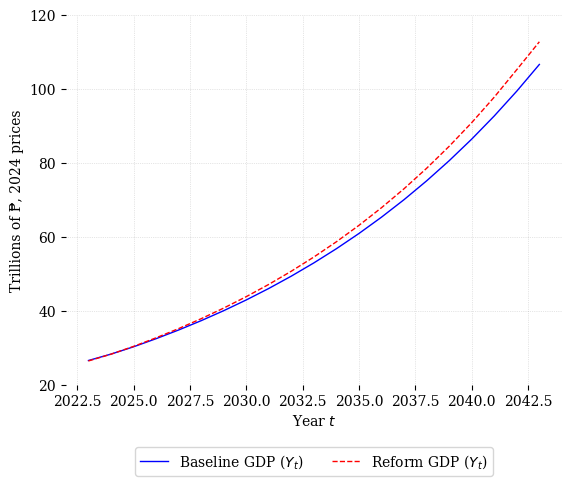

In [22]:
# plot in levels
fig = op.plot_aggregates(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["Y"],
    plot_type="forecast",
    num_years_to_plot=len(NEDA_Forecast),
    start_year=base_params.start_year,
    forecast_data=NEDA_Forecast,
    forecast_units=u"Trillions of \u20b1, 2024 prices",
    )
fig.show()

# Stationarization and its effects on output

In [23]:
# Read in output from the g_y sim
sim_path = os.path.join(CUR_DIR, "OG-PHL-gyup")
base_params = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_BASELINE", "model_params.pkl"
        )
    )
base_tpi = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_BASELINE", "TPI", "TPI_vars.pkl"
        )
    )
reform_params = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_REFORM", "model_params.pkl"
        )
    )
reform_tpi = safe_read_pickle(
    os.path.join(
        sim_path, "OUTPUT_REFORM", "TPI", "TPI_vars.pkl"
        )
    )

/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_31764/564645658.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


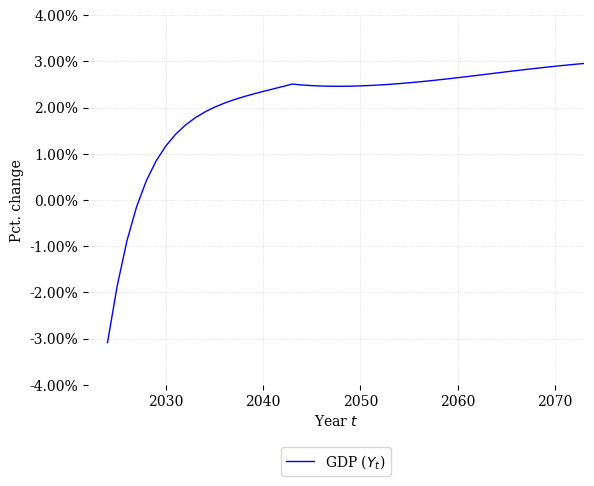

In [24]:
# pp macro plot
# use a op function to plot pct diff in GDP, K, L
fig = op.plot_aggregates(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["Y"],
    plot_type="pct_diff",
    num_years_to_plot=50,
    start_year=base_params.start_year + 1
    )
fig.show()

/var/folders/bw/1cvntf9x02b49nfwgy_qnfn00000gp/T/ipykernel_31764/1981062226.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


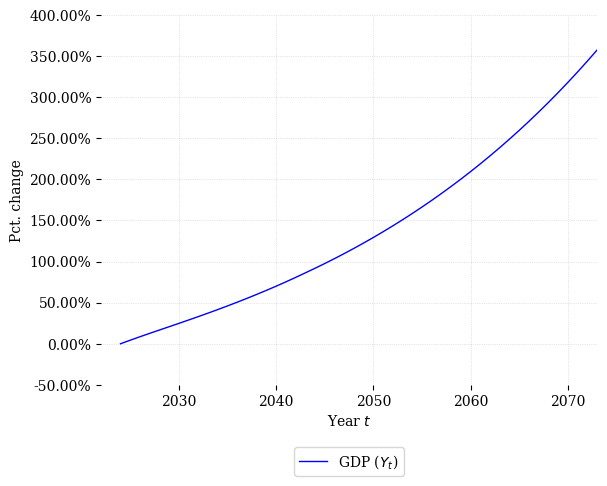

In [25]:
# pp macro plot with unstationarized
fig = op.plot_aggregates(
    base_tpi,
    base_params,
    reform_tpi=reform_tpi,
    reform_params=reform_params,
    var_list=["Y"],
    plot_type="pct_diff",
    stationarized=False,
    num_years_to_plot=50,
    start_year=base_params.start_year + 1
    )
fig.show()